# Permanent magnet assembly B-field simulation

## 4 coil structure

Achieves 2.98e-6 maximum non-uniformity over 2 cm

Maximum B-field along +z direction: 7.412 G
Central B-field along +z axis: 1.79 G
Maximum B-field along +x direction: 1.79 G
Central B-field along +x axis: 1.79 G
Min transverse nonuniformity: 0.0
Max transverse nonuniformity:2.9762212185791584e-06
Min axial nonuniformity: 0.0
Max axial nonuniformity:3.747744220066683e-05


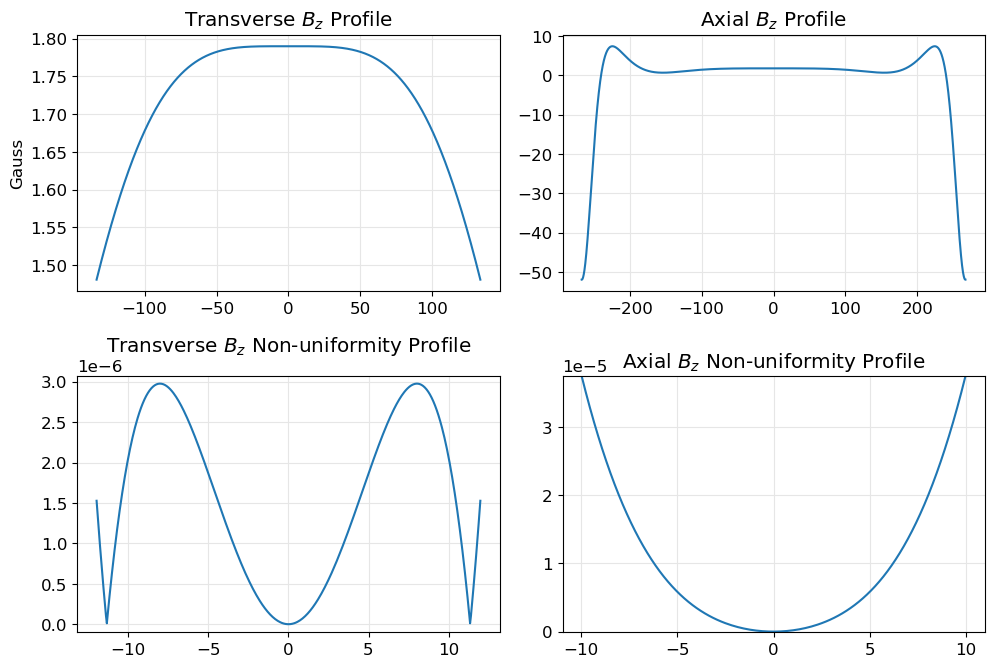

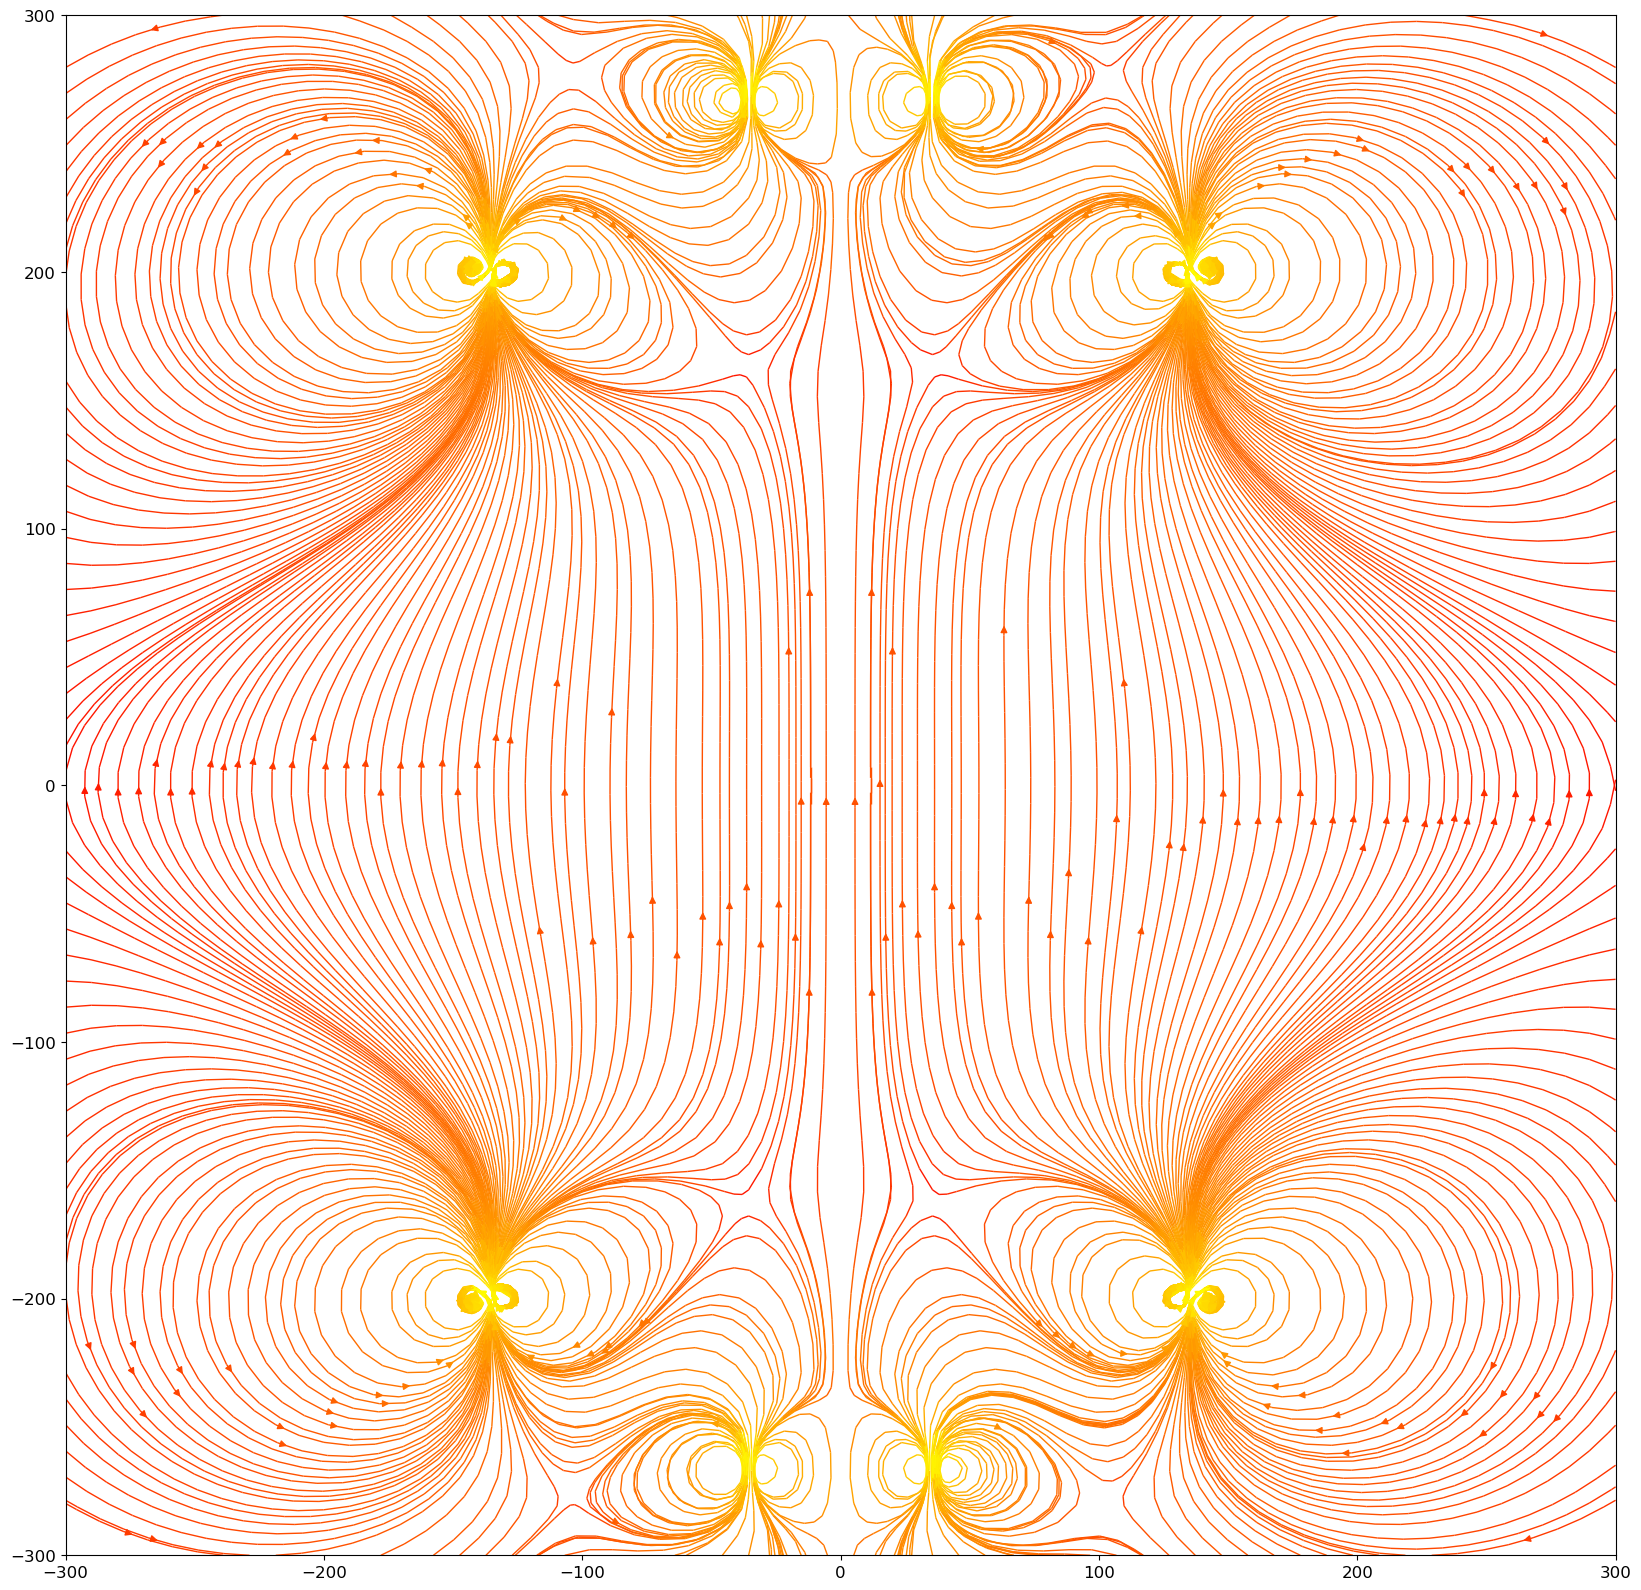

In [11]:
import numpy as np
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream
from 
import magpylib as magpy
from magpylib.magnet import Cylinder,CylinderSegment

"""
custom configuration for 1e-4 max over 4mm
"""
width = 5
thickness = 2.4
innerrad2 = 38.354
innerrad1 = 2.5 * (innerrad2)
dist1 = 2.3 * innerrad
dist2 = dist1 + innerrad * 0.5

"""

"""
width = 5
thickness = 2.4
innerrad2 = 38.354
innerrad1 = innerrad2 * 2.5
dist1 = innerrad1 * 1
dist2 = innerrad1 * 1.2

"""
Achieves 2.98e-6 over 2 cm
"""
width = 5
thickness = 2.4
innerrad2 = 33.354
innerrad1 = innerrad2 * 4
dist1 = innerrad1 * 1.5
dist2 = innerrad1 * 2


Br = 1.09e3 # in mT
mT_to_T = 1e3
mT_to_G = 10

# define rings in maxwell coil
magnets = magpy.Collection()
ring2_top = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad2, innerrad2 + width, thickness, 0, 360),
                           position = (0, 0, +dist2))
ring1_top = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad1, innerrad1 + width, thickness, 0, 360),
                           position = (0, 0, +dist1))
ring1_bot = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad1, innerrad1 + width, thickness, 0, 360),
                           position = (0, 0, -dist1))
ring2_bot = CylinderSegment(magnetization=(0, 0, Br),
                           dimension=(innerrad2, innerrad2 + width, thickness, 0, 360),
                           position = (0, 0, -dist2))
magnets.add(ring1_top).add(ring1_bot)
magnets.add(ring2_top).add(ring2_bot)
# maxwell3.add(ring_mid)

get_field_on_axes(magnets, dist2*2, innerrad1*2, [-12,12], [-10,10])

x_bounds = [-300, 300]
z_bounds = [-300, 300]
outerrad1 = innerrad1 + width
# nearsurface_z = maxwell_dist - thickness/2
# farsurface_z = maxwell_dist + thickness/2

# outerrad_mid = innerrad_mid + width

# cross_section_3_coils = np.array([
#     [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
#     [[innerrad,innerrad,outerrad,outerrad,innerrad], [farsurface_z,nearsurface_z,nearsurface_z,farsurface_z,farsurface_z]],
#     [[-innerrad,-innerrad,-outerrad,-outerrad,-innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]],
#     [[innerrad,innerrad,outerrad,outerrad,innerrad], [-farsurface_z,-nearsurface_z,-nearsurface_z,-farsurface_z,-farsurface_z]],
#     [[-innerrad_mid,-innerrad_mid,-outerrad_mid,-outerrad_mid,-innerrad_mid], [thickness/2,-thickness/2,-thickness/2,thickness/2,thickness/2]],
#     [[innerrad_mid,innerrad_mid,outerrad_mid,outerrad_mid,innerrad_mid], [thickness/2,-thickness/2,-thickness/2,thickness/2,thickness/2]],
# ])
make_flux_stream(magnets, x_bounds, z_bounds, [])